# Activity 2.3 - CNN Network Architectures

#### Objective(s):

This activity aims to introduce how to use CNN network architectures

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to use pretrained model in predicting the object
* Evaluate the accuracy of each pretrained model

#### Resources:
* Jupyter Notebook
* MNIST

#### Procedures
Load the necessary libraries

In [1]:
# install opencv if you haven't
# pip install opencv-python
# pip install pillow

In [2]:
import scipy
scipy.version.full_version

'1.12.0'

In [3]:
from PIL import Image
import keras.utils as image
import numpy as np
import pandas as pd

import cv2

import matplotlib.pyplot as plt


Create a function that will capture and save the image from your webcam

In [4]:
def get_image(camera):
    retval, im = camera.read()
    return im

In [5]:
def save_webcam_image(img_path):

    try:
        camera_port = 0
        ramp_frames = 10
    
        camera = cv2.VideoCapture(camera_port)

        for i in range(ramp_frames):
            retval, im_camera = camera.read()

        retval, im_camera = camera.read()

        im = cv2.resize(im_camera, (224, 224)).astype(np.float32)
        cv2.imwrite(img_path, im)
        del (camera)
        return True
    except ValueError as e:
        print("Image Capture Failed")
    return False

* Test your function.
* Place a clock or any object
* Display the saved image

In [6]:
img_path = "webcam_test_img.png"

if save_webcam_image(img_path) is False:
    # Webcam not active, use the Dog Image
    img_path = "rocking_chair.jpg"
    print("Using the Test Rocking Chair Image: {}".format(img_path))

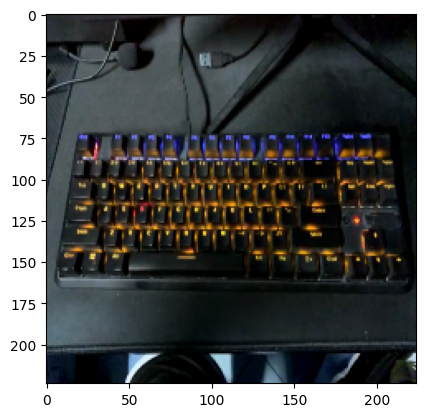

In [7]:
plt.imshow(cv2.imread(img_path))

Use VGG-16 pre-trained model

In [8]:
from keras.applications import vgg16


vgg16_model = vgg16.VGG16(weights='imagenet')
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Create a function to load model, image, preprocess input and targets

In [9]:
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(224, 224)):

    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)
    
    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

Predict the result

In [10]:
predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

1/1 [==============================] - 6s 6s/step


,Predicted Class,Name,Probability
0,n04505470,typewriter_keyboard,0.528205
1,n04264628,space_bar,0.271637
2,n03085013,computer_keyboard,0.192801
3,n03793489,mouse,0.001317
4,n04041544,radio,0.001040
5,n03857828,oscilloscope,0.000730
6,n02666196,abacus,0.000684
7,n03602883,joystick,0.000667
8,n03180011,desktop_computer,0.000562
9,n04392985,tape_player,0.000290


Interpret the result of prediction using VGG16 model

I captured my keyboard using webcam and when I predict the result using VGG16_model, typewriter_keyboard has 52.82% probability that the picture is keyboard. Additionally space_bar is the second highest probability on vgg16_model with 27.16% and computer_keyboard with 19.28%.

Use Resnet50 pretrained model

In [11]:
from keras.applications import resnet

resnet50_model = resnet.ResNet50(weights='imagenet')

resnet50_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

Predict the result

In [12]:
predict_image(resnet50_model, img_path, resnet.preprocess_input, resnet.decode_predictions)

1/1 [==============================] - 2s 2s/step


,Predicted Class,Name,Probability
0,n03085013,computer_keyboard,0.527480
1,n04505470,typewriter_keyboard,0.353658
2,n04264628,space_bar,0.084918
3,n03793489,mouse,0.012940
4,n03180011,desktop_computer,0.003255
5,n03691459,loudspeaker,0.002297
6,n03832673,notebook,0.002216
7,n03602883,joystick,0.002020
8,n03857828,oscilloscope,0.001796
9,n03782006,monitor,0.001582


Interpret the result using RESNET50 pretrained model

#type your answer here

After using resnet50_model to predict the captured image, computer_keyboard is the highest probability with 52.75%, second is typewriter_keyboard with 35.36% and third is space_bar with only 8.5%.

#### Supplementary Activity

* Use at least three pretrained model and predict the result using the saved image. 
* Compare their accuracy results.

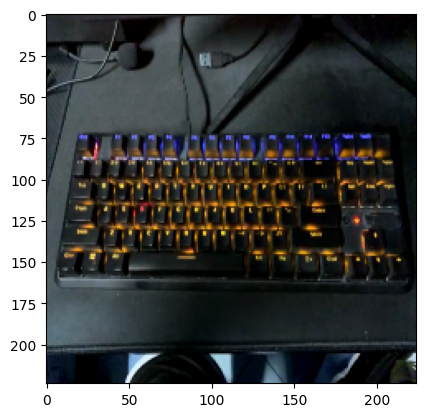

In [24]:
plt.imshow(cv2.imread(img_path))

## VGG16 Model

In [25]:
#### VGG16
predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

1/1 [==============================] - 0s 27ms/step


,Predicted Class,Name,Probability
0,n04505470,typewriter_keyboard,0.528205
1,n04264628,space_bar,0.271637
2,n03085013,computer_keyboard,0.192801
3,n03793489,mouse,0.001317
4,n04041544,radio,0.001040
5,n03857828,oscilloscope,0.000730
6,n02666196,abacus,0.000684
7,n03602883,joystick,0.000667
8,n03180011,desktop_computer,0.000562
9,n04392985,tape_player,0.000290


## ResNet50 Model

In [26]:
#### RESTNET50
predict_image(resnet50_model, img_path, resnet.preprocess_input, resnet.decode_predictions)

1/1 [==============================] - 0s 40ms/step


,Predicted Class,Name,Probability
0,n03085013,computer_keyboard,0.527480
1,n04505470,typewriter_keyboard,0.353658
2,n04264628,space_bar,0.084918
3,n03793489,mouse,0.012940
4,n03180011,desktop_computer,0.003255
5,n03691459,loudspeaker,0.002297
6,n03832673,notebook,0.002216
7,n03602883,joystick,0.002020
8,n03857828,oscilloscope,0.001796
9,n03782006,monitor,0.001582


## Xception Model

In [50]:
from keras.applications import xception

In [51]:
import keras
xception_model = keras.applications.Xception(weights = "imagenet")
xception_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [52]:
predict_image(xception_model, 'img_resized.png', xception.preprocess_input, xception.decode_predictions, (299,299))

1/1 [==============================] - 1s 1s/step


,Predicted Class,Name,Probability
0,n03085013,computer_keyboard,0.706702
1,n04264628,space_bar,0.128728
2,n04505470,typewriter_keyboard,0.039850
3,n03180011,desktop_computer,0.025006
4,n03793489,mouse,0.011543
5,n02666196,abacus,0.005939
6,n03642806,laptop,0.003764
7,n03602883,joystick,0.003426
8,n03832673,notebook,0.001907
9,n03782006,monitor,0.001774


#### Conclusion

#type your answer here

In this activity, I learned how to use pretrained model to predict objects. Keras has many applications that we can use to predict objects and in this activity, I used VGG16, ResNet50, and Xception. The most accurate pretrained model that I used is Xception because it has the highest accuracy among the three pretrained model.